In [101]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
np.random.seed(42)

### Generate input data

In [104]:
x = 2 * np.random.randn(100,1)

In [105]:
y = 4 + 3* x + np.random.randn(100,1)

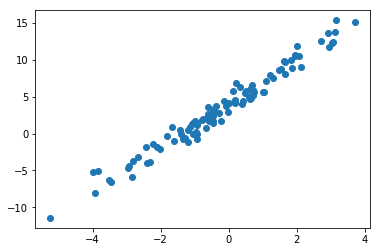

In [106]:
plt.plot(x,y,'o')
plt.show()

Let's fit one linear regression model and check the coefficients

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lin_reg = LinearRegression()

In [109]:
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
lin_reg.intercept_,lin_reg.coef_

(array([4.00742783]), array([[2.92837142]]))

---

### Let's find out the values of intercept and coefficient using batch gradient descent

In [111]:
def Batch_Gradient_Descent(x,y,initial_m,initial_b,learning_rate,n_iter):
    m = initial_m
    b = initial_b
    n = len(x)

    for i in range(n_iter):
        y_hat = m * x + b
        cost = (1/n) * sum([val**2 for val in (y-y_hat)])
        change_in_m = -(2/n)*sum(x*(y-y_hat))
        change_in_b = -(2/n)*sum(y-y_hat)
        m = m - learning_rate * change_in_m
        b = b - learning_rate * change_in_b
        print ("Coeff of x is {},intercept is {}, loss is {} iteration {}".format(m,b,cost, i))
    coeffs = np.array([[b],[m]])    
    return coeffs


In [112]:
coeffs = Batch_Gradient_Descent(x,y,initial_m=0,initial_b=0,learning_rate=0.09,n_iter=100)

Coeff of x is [1.5944986],intercept is [0.61186059], loss is [40.44625073] iteration 0
Coeff of x is [2.26209157],intercept is [1.17319619], loss is [16.41994868] iteration 1
Coeff of x is [2.55301115],intercept is [1.65844919], loss is [9.60115043] iteration 2
Coeff of x is [2.68878248],intercept is [2.06723259], loss is [6.50133613] iteration 3
Coeff of x is [2.75896245],intercept is [2.40751076], loss is [4.6448571] iteration 4
Coeff of x is [2.80006019],intercept is [2.68916252], loss is [3.42575351] iteration 5
Coeff of x is [2.82720711],intercept is [2.9216534], loss is [2.6056764] iteration 6
Coeff of x is [2.8468753],intercept is [3.11331079], loss is [2.05077925] iteration 7
Coeff of x is [2.86199298],intercept is [3.27120515], loss is [1.6747884] iteration 8
Coeff of x is [2.8740085],intercept is [3.40124369], loss is [1.41993746] iteration 9
Coeff of x is [2.88372831],intercept is [3.50832449], loss is [1.24718293] iteration 10
Coeff of x is [2.89166159],intercept is [3.5964

In [113]:
coeffs.shape

(2, 1, 1)

In [114]:
coeffs = coeffs.reshape(-1,1)

### Let's predict for new instances

In [115]:
x_new = np.array([[0],[2]])

In [116]:
x_new

array([[0],
       [2]])

In [117]:
x_new_ones = np.c_[np.ones((2,1)),x_new]

In [118]:
x_new_ones

array([[1., 0.],
       [1., 2.]])

In [119]:
y_predict = x_new_ones.dot(coeffs)

In [120]:
y_predict

array([[4.00742781],
       [9.86417065]])